In [ ]:
#lyb to be imported for Analysis

In [346]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [347]:
df_Zomato=pd.read_csv(r"C:\Users\Harshith\OneDrive\Desktop\zomato.csv")

In [ ]:
#the dataset was Obtained from Kaggle 
#It is 'Zomato' Data set pertaining to Bengaluru

In [ ]:
#inference to be obtained from the Analysis are 
#1)Which is and is not the Best place to open a Restaurant?
#2)which location in blore give max revinue for Zomato?
#3)Does the online_order, book_table options in the restaurants effect the restaurants rating?
#4)Max count of Rest_type present? 

In [ ]:
#all these questions are answered in the VISUALIZATION part of the analysis

In [348]:
df_Zomato.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [349]:
df_Zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [350]:
def missing_pcr(df):
# Calculate missing value and their percentage for each column
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                      columns={
                              'index':"Column",
                              0:'Missing_Percentage (%)'
                      }
                   )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                  columns={
                          'index':"Column",
                          0:"Missing_value_count"
                  } 
              )
# Sort the data frame
#df_missing = df_missing.sort_values('Nissing_Percentage (%), ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent,how='inner',left_on='Column',right_on='Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final
missing_pcr(df_Zomato)

,Column,Missing_value_count,Missing_Percentage (%)
10,dish_liked,28078,54.29
5,rate,7775,15.03
7,phone,1208,2.34
12,approx_cost(for two people),346,0.67
9,rest_type,227,0.44
11,cuisines,45,0.09
8,location,21,0.04
15,listed_in(type),0,0.00
14,menu_item,0,0.00
13,reviews_list,0,0.00


In [ ]:
#above is a function written to display % and count of missing values according to columns,
#in decending order

In [351]:
df_Zomato.shape

(51717, 17)

In [352]:
#51717 rows and 17 cloumns

In [353]:
df_Zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
#Dropping the columns:-'url','address','phone','menu_item','dish_liked','reviews_list'
#Customer details , menu_item , 'dish_liked' are not required for our analysis 
#reviews_list is also not required as there is rating column,

In [354]:
df_Z=df_Zomato.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)

In [355]:
df_Z.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [356]:
df_Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [357]:
missing_pcr(df_Z)

,Column,Missing_value_count,Missing_Percentage (%)
3,rate,7775,15.03
8,approx_cost(for two people),346,0.67
6,rest_type,227,0.44
7,cuisines,45,0.09
5,location,21,0.04
0,name,0,0.00
1,online_order,0,0.00
2,book_table,0,0.00
4,votes,0,0.00
9,listed_in(type),0,0.00


In [358]:
#as there may be some Duplicate values present in the data set its better to drop the duplicate values
df_Z.drop_duplicates(inplace=True)

In [359]:
df_Z.shape

(51609, 11)

In [360]:
missing_pcr(df_Z)

,Column,Missing_value_count,Missing_Percentage (%)
3,rate,7755,15.03
8,approx_cost(for two people),344,0.67
6,rest_type,227,0.44
7,cuisines,45,0.09
5,location,21,0.04
0,name,0,0.00
1,online_order,0,0.00
2,book_table,0,0.00
4,votes,0,0.00
9,listed_in(type),0,0.00


In [ ]:
#lets clean the each columns in the  Data set so as to perform the Analysis 

In [433]:
#column "rate" i.e rating provided by customers out of 5 and for New resto the rating term is 'NEW'

In [361]:
df_Z['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [434]:
#there are four type of data in the column
#1 float (rating/5)
#2 '-'
#3 'NEW'
# nan

In [ ]:
#to analysis the data , the data type of the coulmn should be of same data type 
#& also the rating is given in fraction to be converted to whole number 

In [363]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
df_Z['rate']=df_Z['rate'].apply(handlerate)

In [364]:
df_Z['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [365]:
df_Z['rate'].isnull().sum()

10019

In [435]:
#as there are 10019 null ('nan') values in 'rate' column,
#filling the null values with mean of the all rows in the Rate columns

In [367]:
df_Z['rate'].fillna(df_Z['rate'].mean(),inplace=True)

In [368]:
df_Z['rate'].isnull().sum()

0

In [369]:
df_Z.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [ ]:
#column 'rest_type'

In [370]:

len(df_Z['rest_type'].unique())

94

In [371]:
df_Z['rest_type'].isnull().sum()

227

In [436]:
#We could also replace the 'nan' values in 'rest_type' with MODE method using the below code 
#df_Z['rest_type'].fillna(df_Z['rest_type'].mode()[0],inplace=True)

In [375]:
df_Z['rest_type'].mode()

0    Quick Bites
Name: rest_type, dtype: object

In [373]:
pd.set_option('display.max_rows',100) #to display the 94 rows present

In [438]:
#df_Z['rest_type'].unique()

In [437]:
#But as there are 51609 rows, It is better to drop the rows having nan values 

In [381]:
df_Z.dropna(inplace=True)
df_Z.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [382]:
missing_pcr(df_Z)

,Column,Missing_value_count,Missing_Percentage (%)
0,name,0,0.0
1,online_order,0,0.0
2,book_table,0,0.0
3,rate,0,0.0
4,votes,0,0.0
5,location,0,0.0
6,rest_type,0,0.0
7,cuisines,0,0.0
8,approx_cost(for two people),0,0.0
9,listed_in(type),0,0.0


In [383]:
df_Z.shape

(51042, 11)

In [ ]:
#changing the columns name to our convience

In [384]:
df_Z.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type','listed_in(city)':'city'}, inplace = True)
df_Z.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [ ]:
#cleaning column 'location'

In [385]:
df_Z['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [386]:
len(df_Z['location'].unique())

93

In [ ]:
#there are 94 values to the column 'location'

In [ ]:
#And as there are two columns which gives same values its better to drop city column

In [387]:
df_Z=df_Z.drop('city',axis=1)

In [ ]:
###The below function gives all unique values ,and its count

In [388]:
#unique values,data types
for column in df_Z.columns:
    if df_Z[column].dtypes==object:
        print(str(column)+' : '+str(df_Z[column].unique()))
        print(df_Z[column].value_counts())
        print('*'*10)

name : ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Mast Biryani - Night Express                                1
Kings Court Daba                                            1
New Prakash Hotel                                           1
Taja Coffee                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8723, dtype: int64
**********
online_order : ['Yes' 'No']
Yes    30228
No     20814
Name: online_order, dtype: int64
**********
book_table : ['Yes'

In [ ]:
#To modify the Cost2plates column ,
#as the values in Cost2plates column is in 'Decimal Numeric System' so it should be converted to 'Int' format for further analysis

In [389]:
def handelcomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)  #int also could be used had data has only whole number
    else:
        return float(value)
#function to convert the 'Decimal Numeric System' to float\int format

In [390]:
df_Z['Cost2plates']=df_Z['Cost2plates'].apply(handelcomma)

In [391]:
df_Z['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [392]:
df_Z.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [ ]:
#'rest_type' column

In [393]:
df_Z['rest_type'].value_counts()

Quick Bites                      19010
Casual Dining                    10253
Cafe                              3682
Delivery                          2574
Dessert Parlor                    2242
Takeaway, Delivery                2008
Bakery                            1140
Casual Dining, Bar                1130
Beverage Shop                      863
Bar                                686
Food Court                         616
Sweet Shop                         468
Bar, Casual Dining                 411
Lounge                             395
Pub                                355
Fine Dining                        345
Casual Dining, Cafe                311
Beverage Shop, Quick Bites         293
Bakery, Quick Bites                286
Mess                               264
Pub, Casual Dining                 255
Sweet Shop, Quick Bites            178
Kiosk                              176
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery             

In [394]:
#as MAX rest_type has 19010 counts , 
#let any rest_type having less than 1000 count lets consider it as OTHERS
#as the number of unique reduces it would be easier to analysi

In [395]:
rest_types=df_Z['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                      19010
Casual Dining                    10253
Cafe                              3682
Delivery                          2574
Dessert Parlor                    2242
Takeaway, Delivery                2008
Bakery                            1140
Casual Dining, Bar                1130
Beverage Shop                      863
Bar                                686
Food Court                         616
Sweet Shop                         468
Bar, Casual Dining                 411
Lounge                             395
Pub                                355
Fine Dining                        345
Casual Dining, Cafe                311
Beverage Shop, Quick Bites         293
Bakery, Quick Bites                286
Mess                               264
Pub, Casual Dining                 255
Sweet Shop, Quick Bites            178
Kiosk                              176
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery             

In [396]:
restless1000=rest_types[rest_types<1000]
restless1000

Beverage Shop                    863
Bar                              686
Food Court                       616
Sweet Shop                       468
Bar, Casual Dining               411
Lounge                           395
Pub                              355
Fine Dining                      345
Casual Dining, Cafe              311
Beverage Shop, Quick Bites       293
Bakery, Quick Bites              286
Mess                             264
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                     163
Cafe, Dessert Parlor             148
Bakery, Dessert Parlor           147
Microbrewery, Casual Dining      130
Casual Dining, Pub               127
Dessert Parlor, Quick Bites      125
Takeaway                         116
Cafe, Quick Bites                111
Quick Bites, Beverage Shop       101
Food Court, Quick Bites          100
D

In [397]:
def rest_handle(value):
    if value in restless1000:
        return 'others'
    else:
        return value
#function to replace the values to 'others' in rest_type if count is less than 1000

In [398]:
df_Z['rest_type']=df_Z['rest_type'].apply(rest_handle)

In [ ]:
#others countain all the rest_type where its count is less then 1000

In [399]:
df_Z['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [400]:
df_Z.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [ ]:
#as MAX 'location' count has  5056,
#let any location having less than 300 count lets consider it as OTHERS
#as the number of unique reduces it would be easier to analysi

In [401]:
df_Z['location'].value_counts()

BTM                              5056
HSR                              2494
Koramangala 5th Block            2479
JP Nagar                         2218
Whitefield                       2105
Indiranagar                      2026
Jayanagar                        1916
Marathahalli                     1805
Bannerghatta Road                1609
Bellandur                        1268
Electronic City                  1246
Koramangala 1st Block            1236
Brigade Road                     1210
Koramangala 7th Block            1174
Koramangala 6th Block            1127
Sarjapur Road                    1047
Koramangala 4th Block            1017
Ulsoor                           1011
Banashankari                      902
MG Road                           893
Kalyan Nagar                      841
Richmond Road                     803
Malleshwaram                      721
Frazer Town                       714
Basavanagudi                      684
Residency Road                    671
Brookefield 

In [402]:
location=df_Z['location'].value_counts()

In [403]:
location

BTM                              5056
HSR                              2494
Koramangala 5th Block            2479
JP Nagar                         2218
Whitefield                       2105
Indiranagar                      2026
Jayanagar                        1916
Marathahalli                     1805
Bannerghatta Road                1609
Bellandur                        1268
Electronic City                  1246
Koramangala 1st Block            1236
Brigade Road                     1210
Koramangala 7th Block            1174
Koramangala 6th Block            1127
Sarjapur Road                    1047
Koramangala 4th Block            1017
Ulsoor                           1011
Banashankari                      902
MG Road                           893
Kalyan Nagar                      841
Richmond Road                     803
Malleshwaram                      721
Frazer Town                       714
Basavanagudi                      684
Residency Road                    671
Brookefield 

In [404]:
locationcount300=location[location<300]

In [405]:
locationcount300 #countain locations having count less than 300

Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                          78
S

In [406]:
def location(value):
    if value in locationcount300:
        return 'others'
    else:
        return value
#function to replace the values to 'others' in location if count is less than 300
    
df_Z['location']=df_Z['location'].apply(location)

In [407]:
df_Z['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [ ]:
#cuisines column has value_count less than 100 to be grouped as others
#for the eaze of analysis

In [408]:
cuisines = df_Z['cuisines'].value_counts(ascending  = False)

cuisines_lessthan100 = cuisines[cuisines<100]
cuisines_lessthan100

North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: cuisines, Length: 2635, dtype: int64

In [409]:
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
#function to replace the values to 'others' in cuisines if count of the value is less than 100

In [410]:
df_Z['cuisines'] = df_Z['cuisines'].apply(handle_cuisines)
df_Z['cuisines'].value_counts()

others                                              26159
North Indian                                         2852
North Indian, Chinese                                2351
South Indian                                         1820
Biryani                                               903
Bakery, Desserts                                      898
Fast Food                                             796
Desserts                                              754
Cafe                                                  725
South Indian, North Indian, Chinese                   724
Bakery                                                649
Chinese                                               552
Ice Cream, Desserts                                   415
Chinese, North Indian                                 405
Mithai, Street Food                                   363
Desserts, Ice Cream                                   349
North Indian, Chinese, Biryani                        345
South Indian, 

In [411]:
df_Z.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [ ]:
#column Type

In [412]:
df_Z['Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
#as there are only few unique values in the Type column 
#leaving it Untouched

In [413]:
df_Z['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

In [414]:
#DATA VISUALIZATION

In [ ]:
#VISUALIZATION of restaurants 'location'

C:\Users\Harshith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

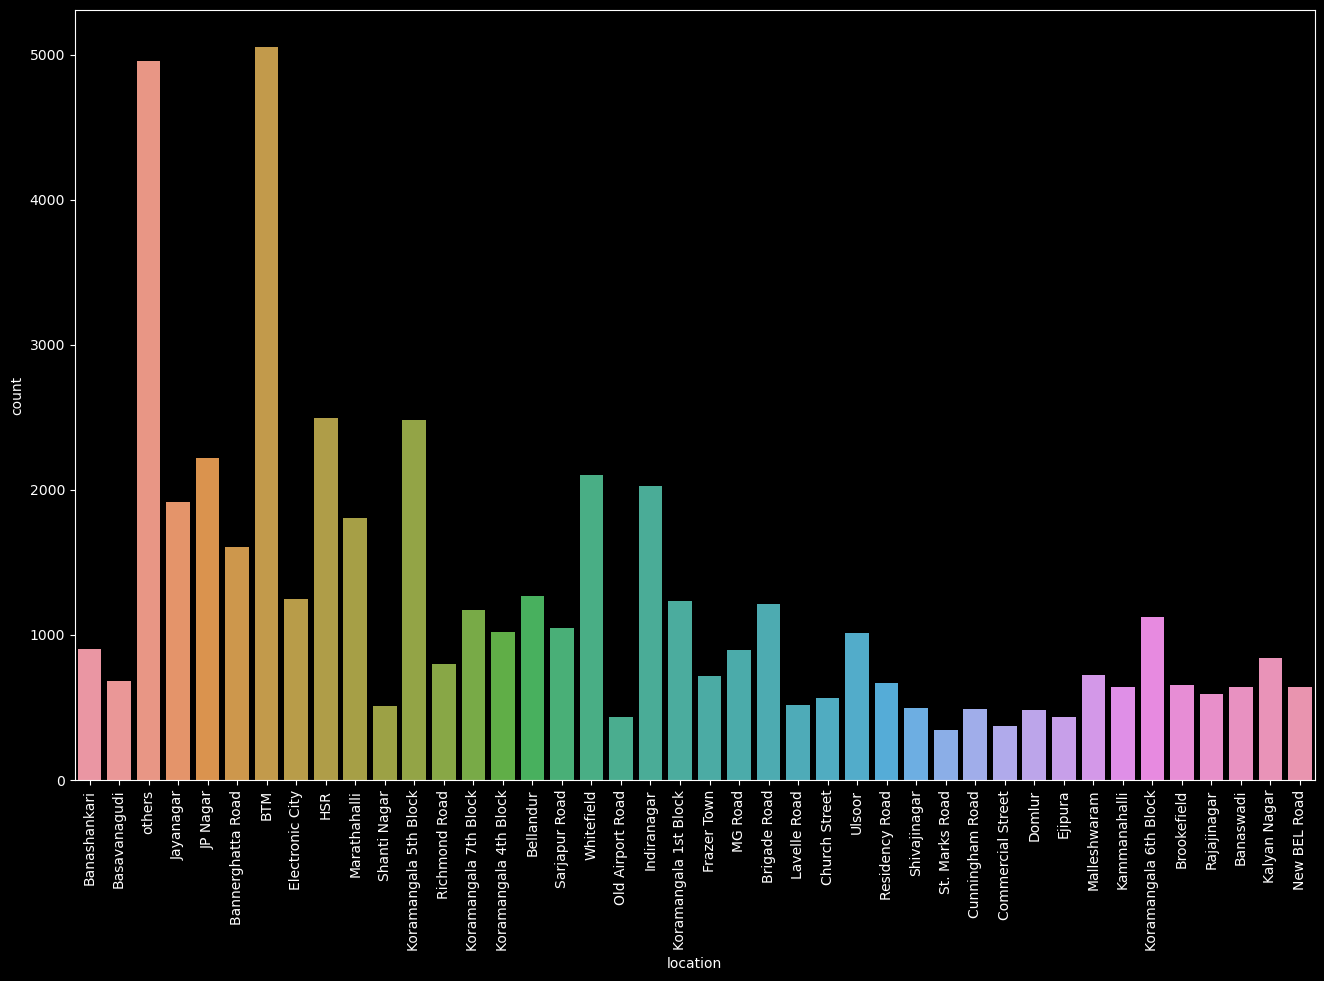

In [415]:
plt.figure(figsize=(16,10))
ax = sns.countplot(df_Z['location'])
plt.xticks(rotation=90)

In [ ]:
#as we can see there are max no_ of restaurants located in BTM layot 
#But others are set of location count having less than 1000(exclude 'others')

In [ ]:
#1)Which is not the Best place to open a Restaurant?
#BTM layot is the Worst place to open a Restaurant

In [ ]:
##VISUALIZATION of restaurants having 'onlne_order'

C:\Users\Harshith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

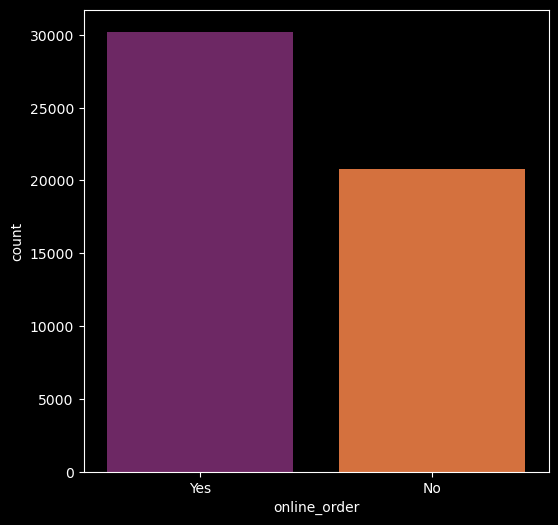

In [416]:
plt.figure(figsize=(6,6))
sns.countplot(df_Z['online_order'],palette='inferno')

In [ ]:
#itseems most of the restaurants have 'online_order'

In [ ]:
##VISUALIZATION of restaurants having 'book_table'

C:\Users\Harshith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

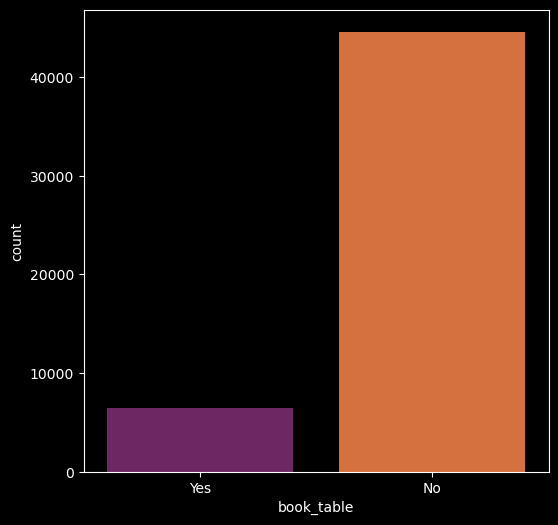

In [417]:
plt.figure(figsize=(6,6))
sns.countplot(df_Z['book_table'],palette='inferno')

In [ ]:
#itseems most of the restaurants do not have 'book_table'

In [ ]:
###VISUALIZATION of restaurants having 'online_order' and its Rating

<AxesSubplot:xlabel='online_order', ylabel='rate'>

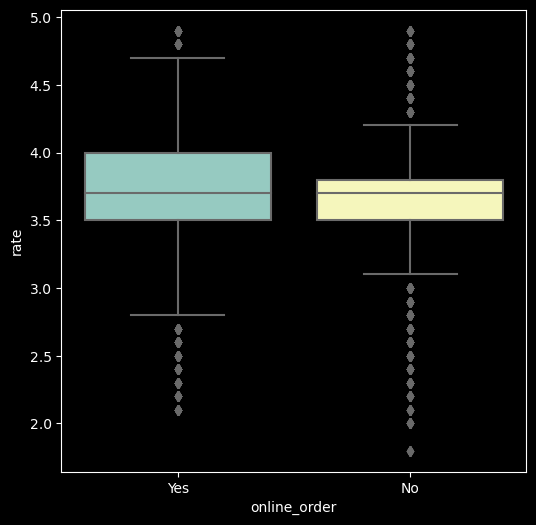

In [418]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df_Z)

In [ ]:
#Rating is avg for both having online_order and not having  

In [ ]:
###VISUALIZATION of restaurants having 'book_table' and its Rating

<AxesSubplot:xlabel='book_table', ylabel='rate'>

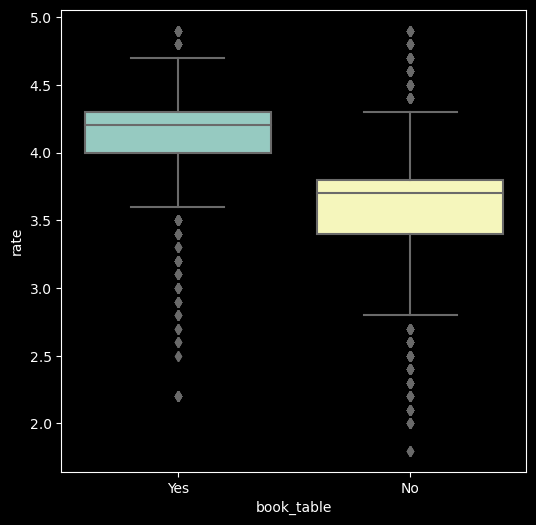

In [419]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df_Z)

In [ ]:
#Rating for having book_table option have hight rating when compared to and not having  

In [420]:
df1 = df_Z.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

In [421]:
#df_Z.groupby(['location','online_order'])['name'].count()

<AxesSubplot:xlabel='location'>

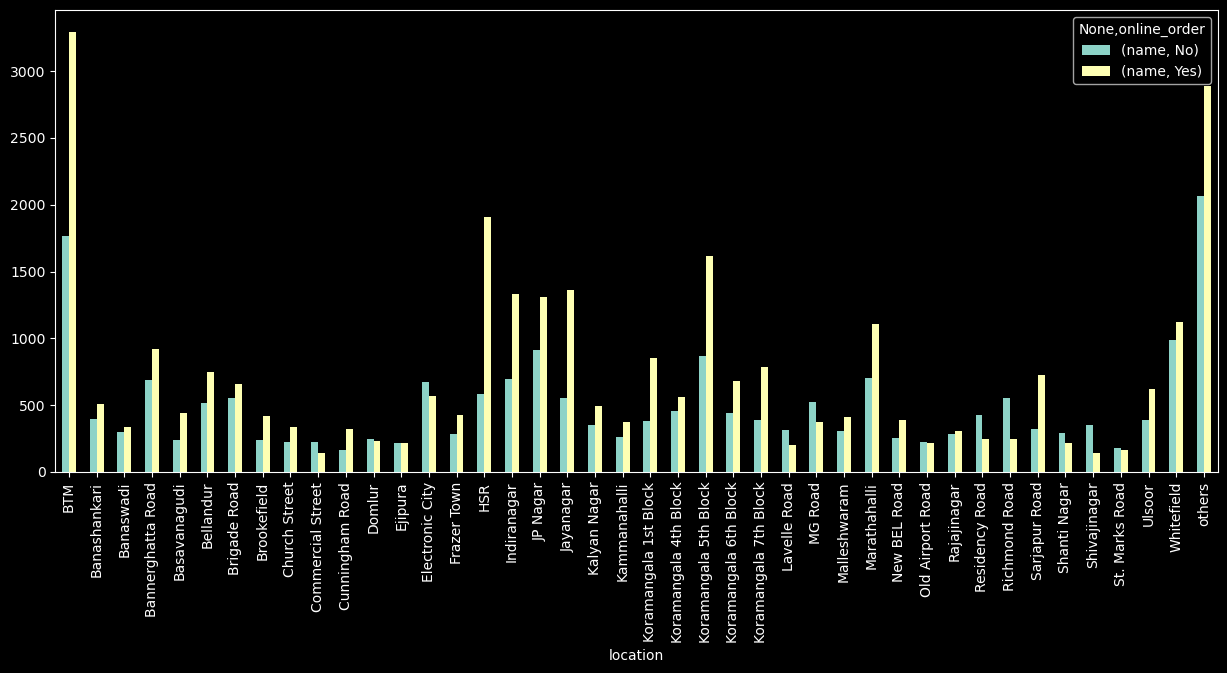

In [422]:
df1.plot(kind='bar',figsize=(15,6))

In [423]:
df2 = df_Z.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<AxesSubplot:xlabel='location'>

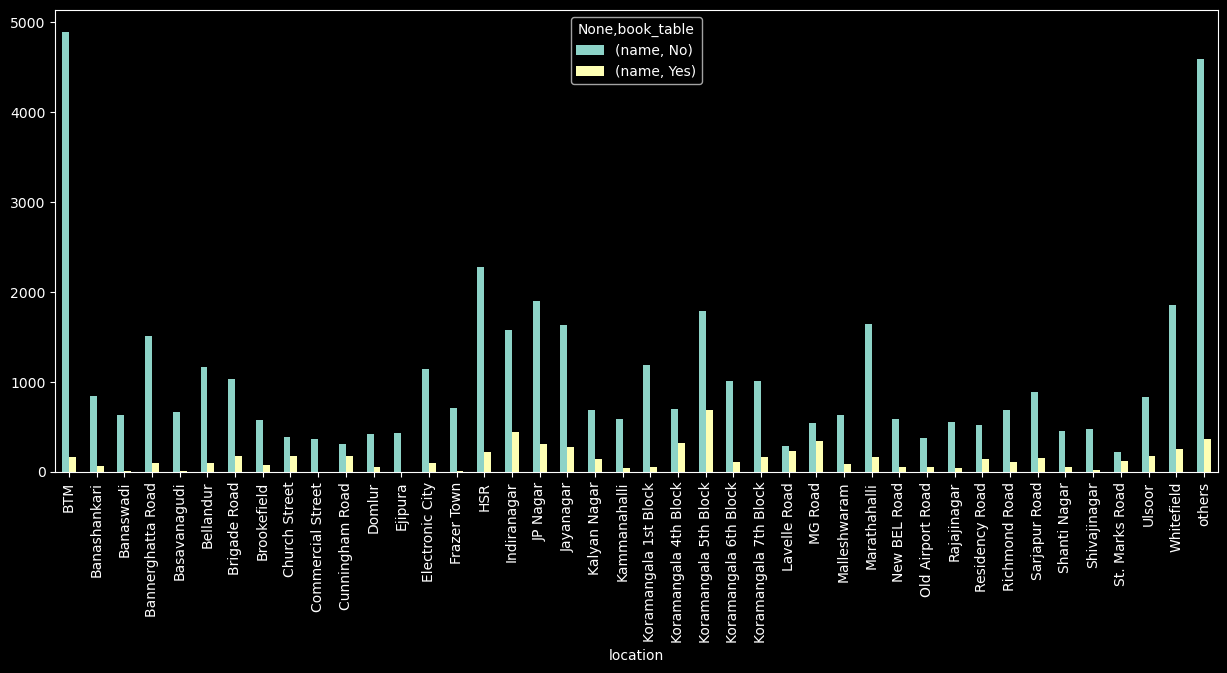

In [424]:
df2.plot(kind='bar',figsize=(15,6))

<AxesSubplot:xlabel='Type', ylabel='rate'>

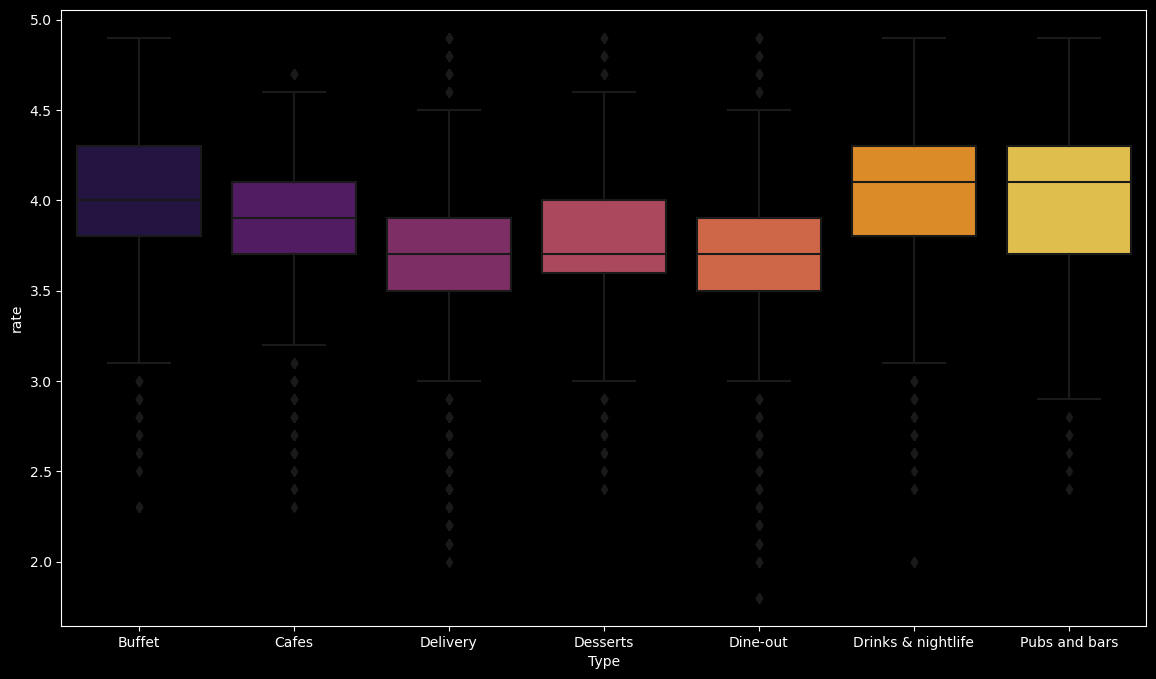

In [425]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df_Z, palette = 'inferno')

In [426]:
df3 = df_Z.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<AxesSubplot:xlabel='location'>

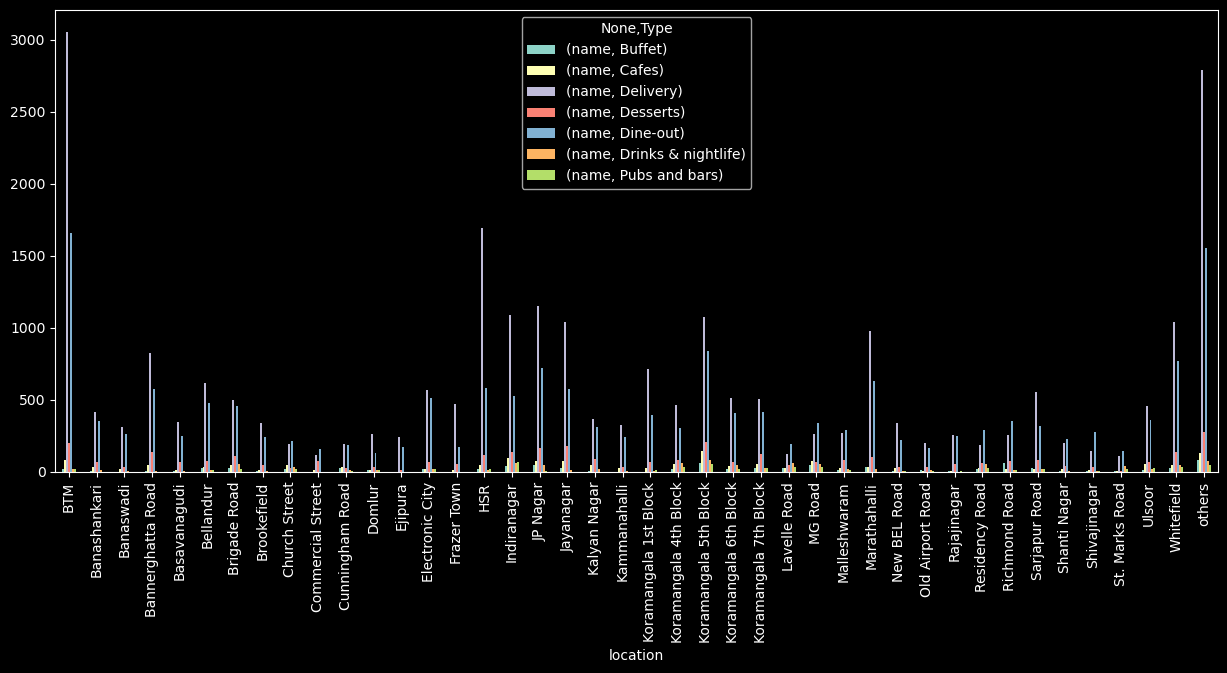

In [427]:
df3.plot(kind='bar',figsize=(15,6))

In [428]:
df4 = df_Z[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


C:\Users\Harshith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

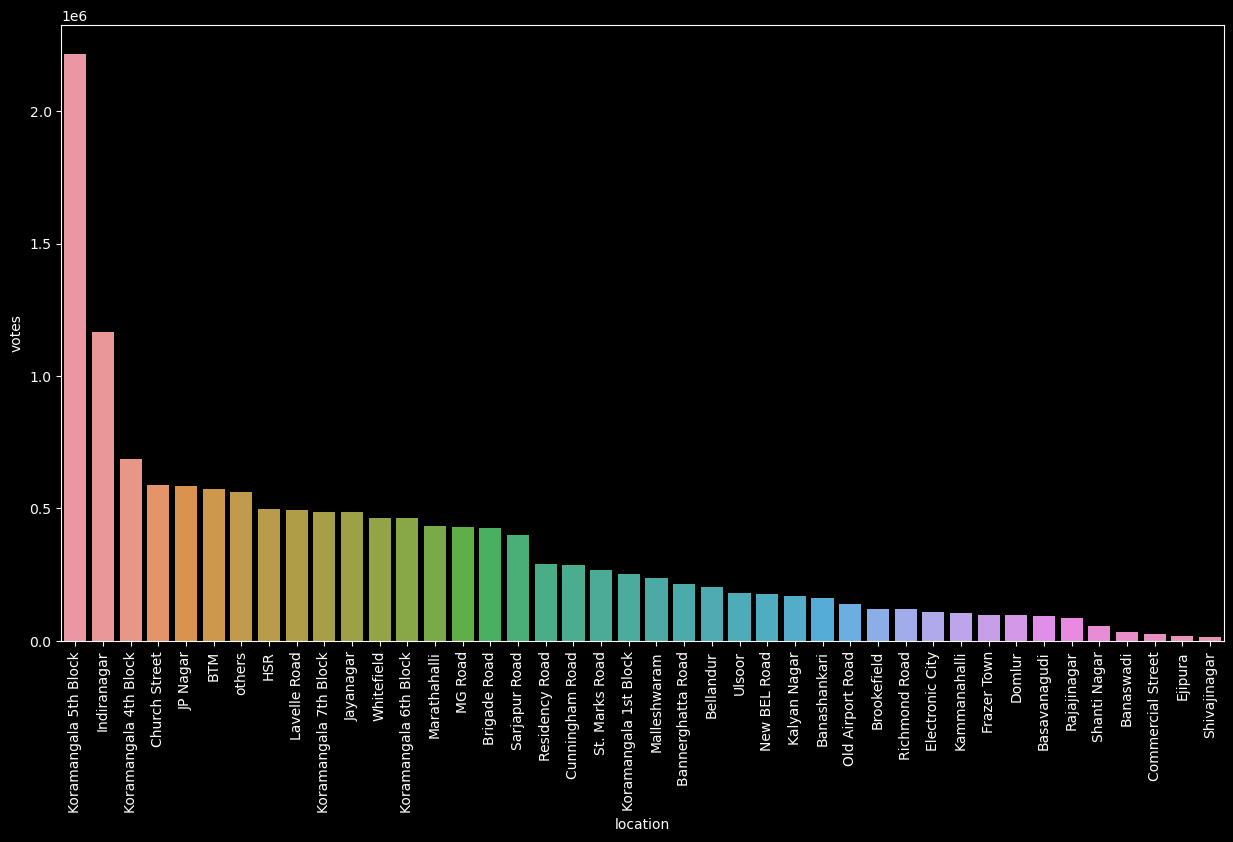

In [429]:
plt.figure(figsize = (15,8))
sns.barplot(df5.index , df5['votes'])
plt.xticks(rotation = 90)

In [430]:
df6 = df_Z[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [431]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


C:\Users\Harshith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

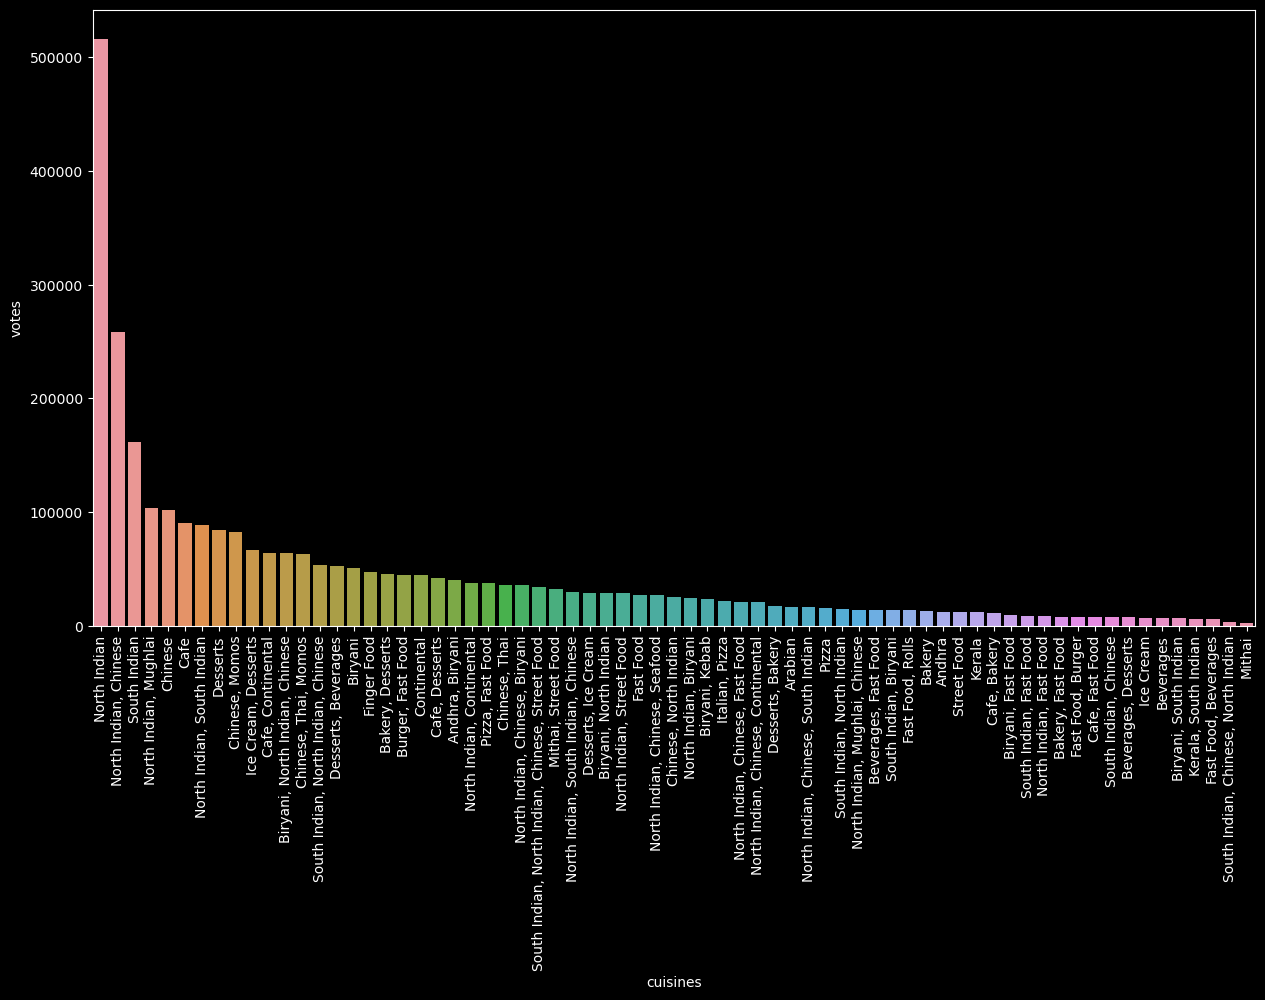

In [432]:
plt.figure(figsize = (15,8))
sns.barplot(df7.index , df7['votes'])
plt.xticks(rotation = 90)